#**Importing necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler

#**Loading Dataset**

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

olivetti_faces = fetch_olivetti_faces()

X = olivetti_faces.data
y = olivetti_faces.target
n_classes = len(set(y))

print("Total samples: ", X.shape[0])
print("Total features: ", X.shape[1])
print("Total classes: ", n_classes)

Total samples:  400
Total features:  4096
Total classes:  40


#**Visualizing Dataset**

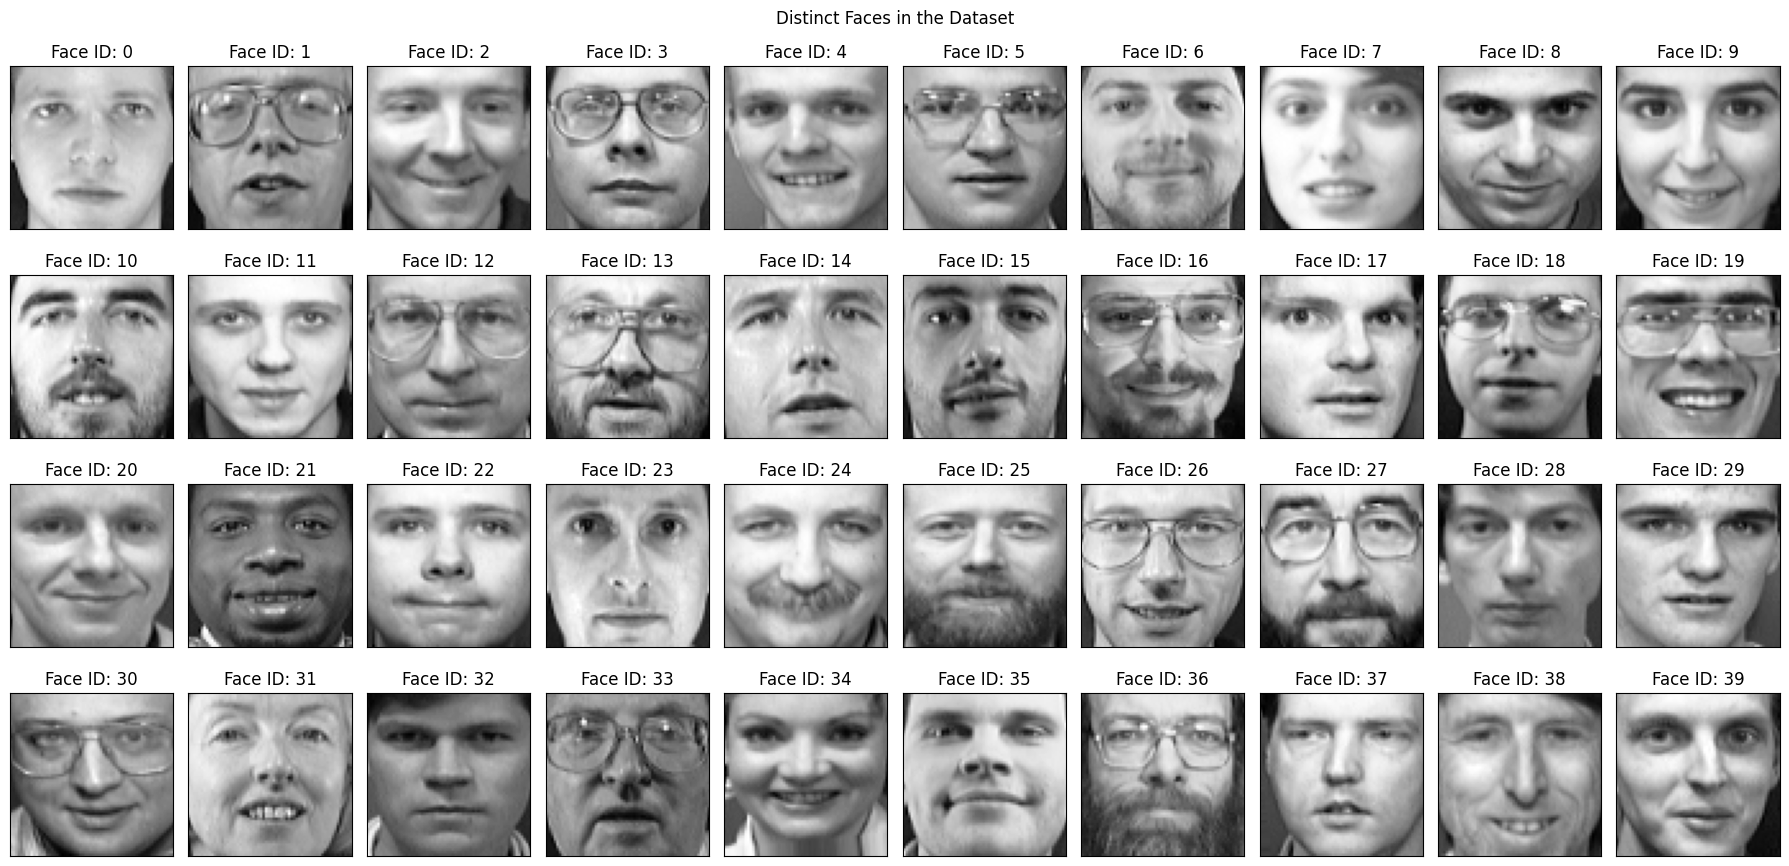

In [ ]:
def plot_faces(image_data, person_ids, rows=4, cols=10, img_shape=(64, 64), title="Distinct Faces in the Dataset"):
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(18, 9))
    axes = axes.flatten()

    for idx, person_id in enumerate(person_ids):
        image_index = person_id * 10
        axes[idx].imshow(image_data[image_index].reshape(img_shape), cmap='gray')
        axes[idx].set_xticks([])
        axes[idx].set_yticks([])
        axes[idx].set_title(f"Face ID: {person_id}")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

face_ids = range(40)
plot_faces(X, face_ids)

#**Reshaping Matrix form of images to Vector Form**

In [ ]:
data = olivetti_faces.images
X=data.reshape((data.shape[0],data.shape[1]*data.shape[2]))
print("X shape:",X.shape)

X shape: (400, 4096)


#**Splitting Dataset/ Creating Dataframe**

X_train shape: (280, 4096)
y_train shape:(280,)


<Axes: title={'center': 'Number of Samples for Each Classes'}, xlabel='subject ids'>

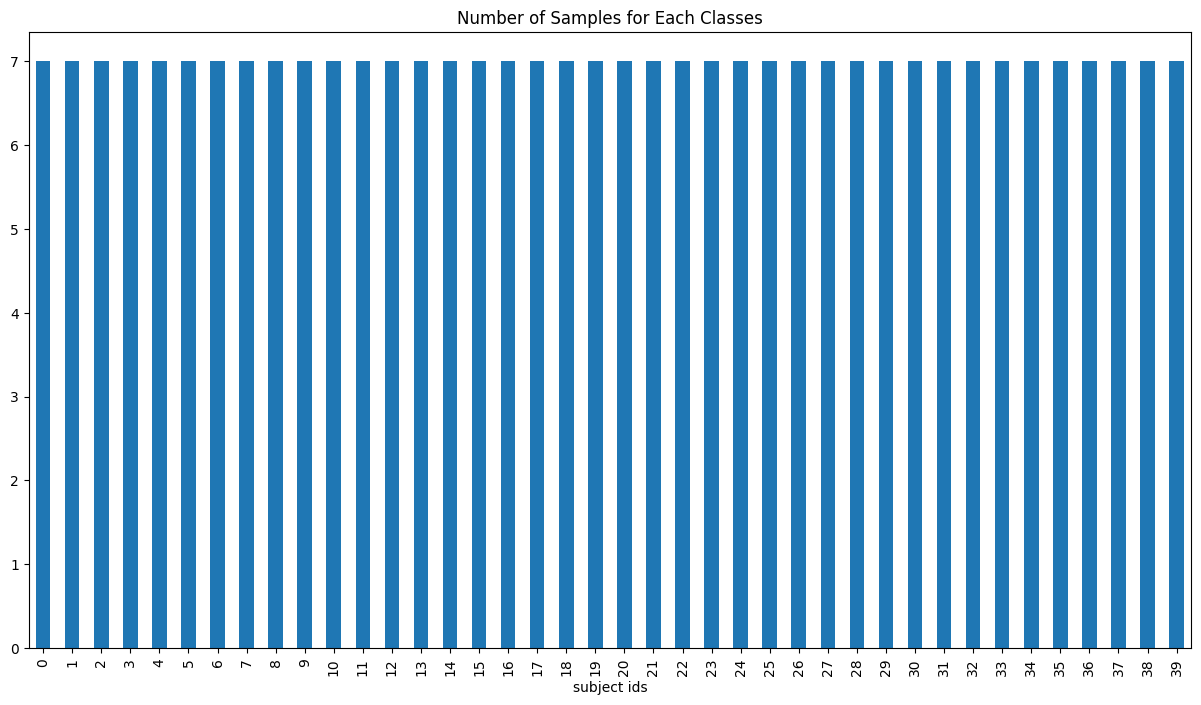

In [ ]:
target = olivetti_faces.target
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

#**Applying PCA**

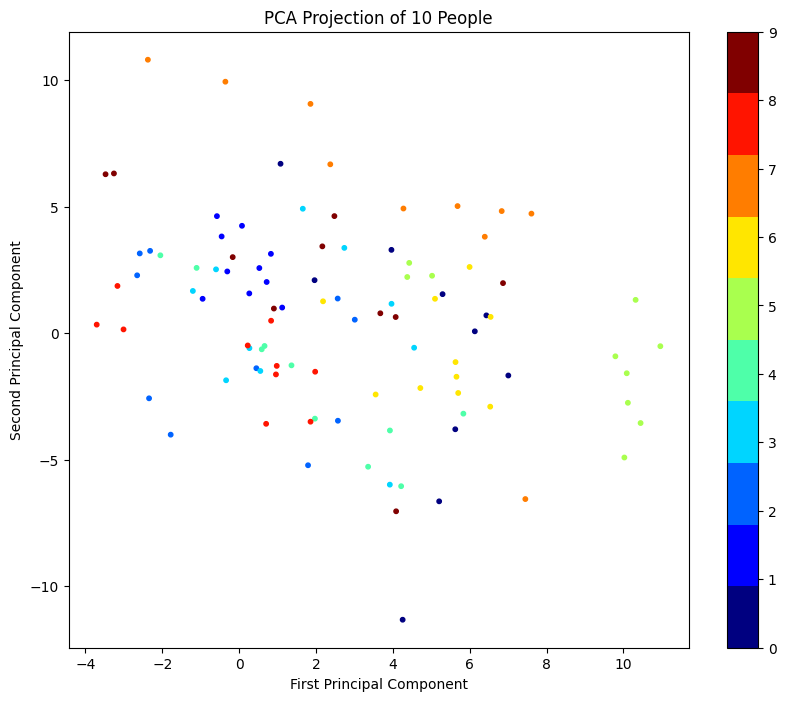

In [ ]:
def plot_pca_projection(data, target, num_people=10, num_components=2):
    pca = PCA(n_components=num_components)
    pca.fit(data)
    transformed_data = pca.transform(data)

    index_range = num_people * 10
    fig, ax = plt.subplots(figsize=(10, 8))

    scatter = ax.scatter(
        transformed_data[:index_range, 0],
        transformed_data[:index_range, 1],
        c=target[:index_range],
        s=10,
        cmap=plt.get_cmap('jet', num_people)
    )

    ax.set_xlabel("First Principal Component")
    ax.set_ylabel("Second Principal Component")
    ax.set_title(f"PCA Projection of {num_people} People")
    fig.colorbar(scatter)
    plt.show()

plot_pca_projection(X, target)

#**Calculating Optimum number of Parameters for PCA**

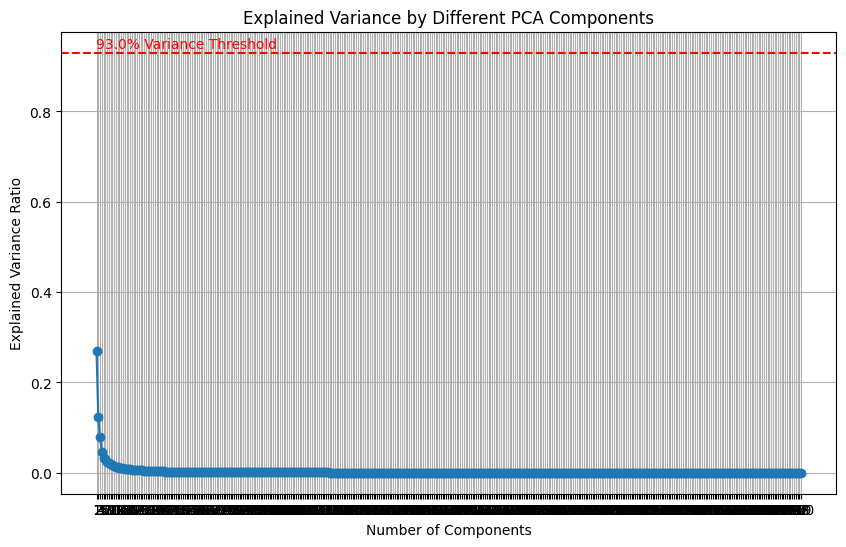

Optimal number of components for 93.0% variance: 93


In [ ]:
def plot_explained_variance(data, variance_threshold=0.93):
    standardized_data = StandardScaler().fit_transform(data)

    pca = PCA()
    pca.fit(standardized_data)

    explained_variance = pca.explained_variance_ratio_

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
    plt.title('Explained Variance by Different PCA Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid()
    plt.xticks(range(1, len(explained_variance) + 1))
    plt.axhline(y=variance_threshold, color='r', linestyle='--')
    plt.text(0.5, variance_threshold + 0.01, f'{variance_threshold*100}% Variance Threshold', color='red', fontsize=10)
    plt.show()

    optimal_components = np.argmax(np.cumsum(explained_variance) >= variance_threshold) + 1
    print(f'Optimal number of components for {variance_threshold*100}% variance: {optimal_components}')

plot_explained_variance(X)

#**PCA with optimal Components (n = 93)**

In [ ]:
n_components=93
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=93, whiten=True)

#**Show average face**
An average face is a concept used in image processing and computer vision, particularly in the study of facial recognition and analysis. It represents the mean or typical appearance of a group of faces from a dataset.

Text(0.5, 1.0, 'Average Face')

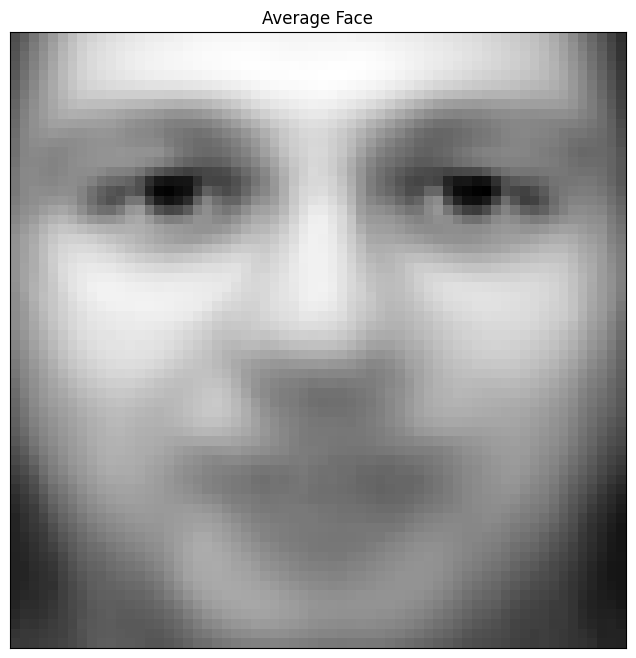

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

#**Eigen Faces**
In the context of face images, each face can be approximated as a linear combination of a set of eigenfaces. The idea is that a new face image can be represented as a weighted sum of these eigenfaces.

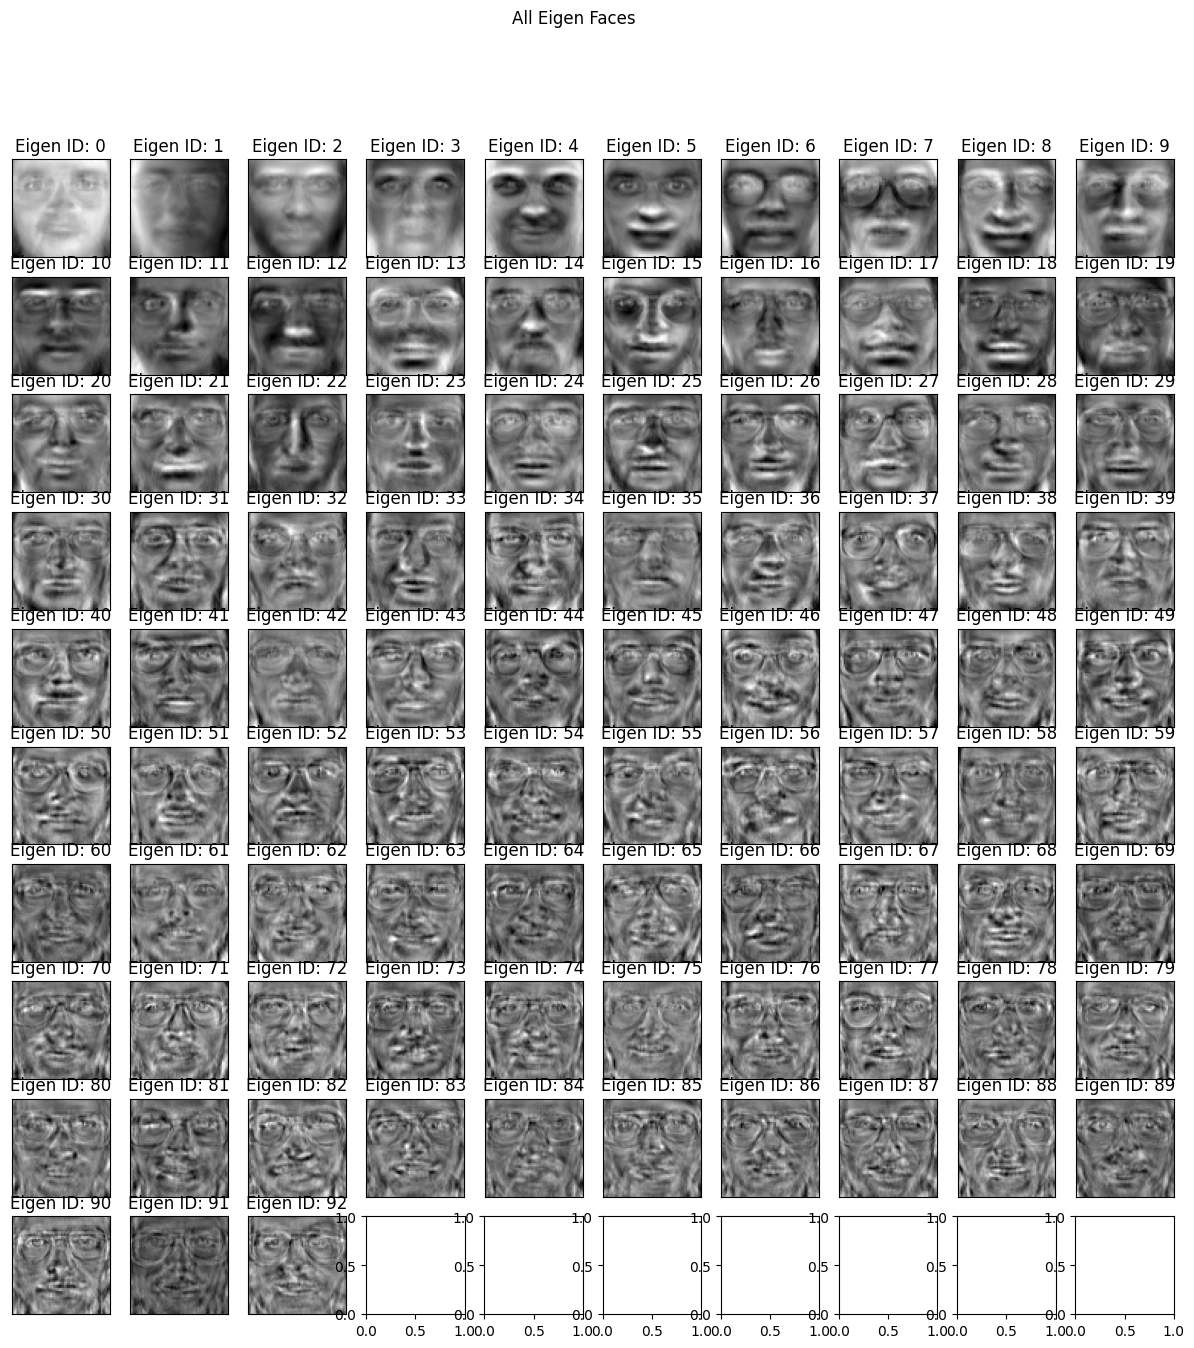

In [ ]:
number_of_eigenfaces = len(pca.components_)
eigen_faces = pca.components_.reshape((number_of_eigenfaces, data.shape[1], data.shape[2]))

cols = 10
rows = (number_of_eigenfaces + cols - 1) // cols

fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))
axarr = axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i], cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title(f"Eigen ID: {i}")
plt.suptitle("All Eigen Faces")
plt.show()


#**Projecting Image Data to Eigen Faces**


In [ ]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

#**Perfoming Naive Bayes to classify test dataset**

Accuracy: 0.78


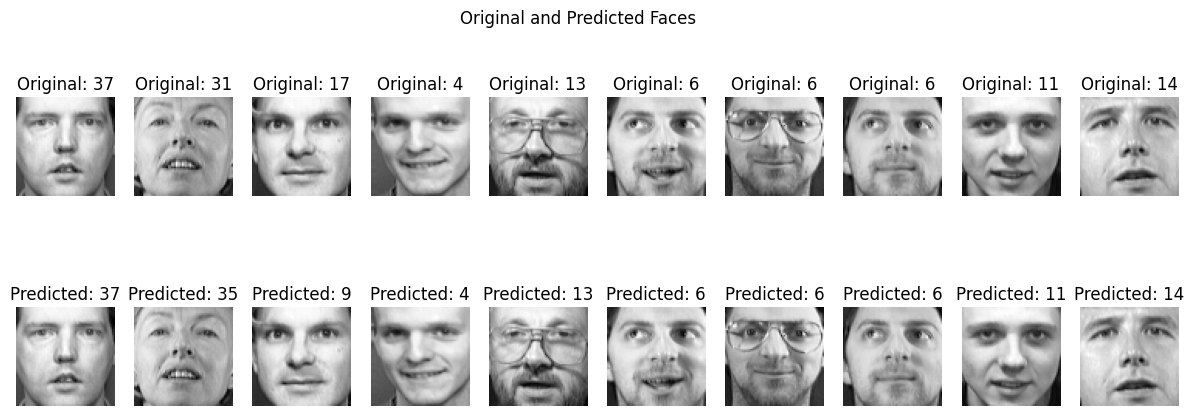

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train_pca, y_train)

y_pred = classifier.predict(X_test_pca)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

indices = np.random.choice(len(X_test), 10, replace=False)
X_test_selected = X_test[indices]
y_test_selected = y_test[indices]
y_pred_selected = y_pred[indices]

fig, axarr = plt.subplots(2, 10, figsize=(15, 5))

for i in range(10):
    axarr[0, i].imshow(X_test_selected[i].reshape(64, 64), cmap='gray')
    axarr[0, i].set_title(f'Original: {y_test_selected[i]}')
    axarr[0, i].axis('off')

    axarr[1, i].imshow(X_test_selected[i].reshape(64, 64), cmap='gray')
    axarr[1, i].set_title(f'Predicted: {y_pred_selected[i]}')
    axarr[1, i].axis('off')

plt.suptitle("Original and Predicted Faces")
plt.show()


#**Perfoming Logistic Regression to classify test dataset**

Accuracy: 0.91


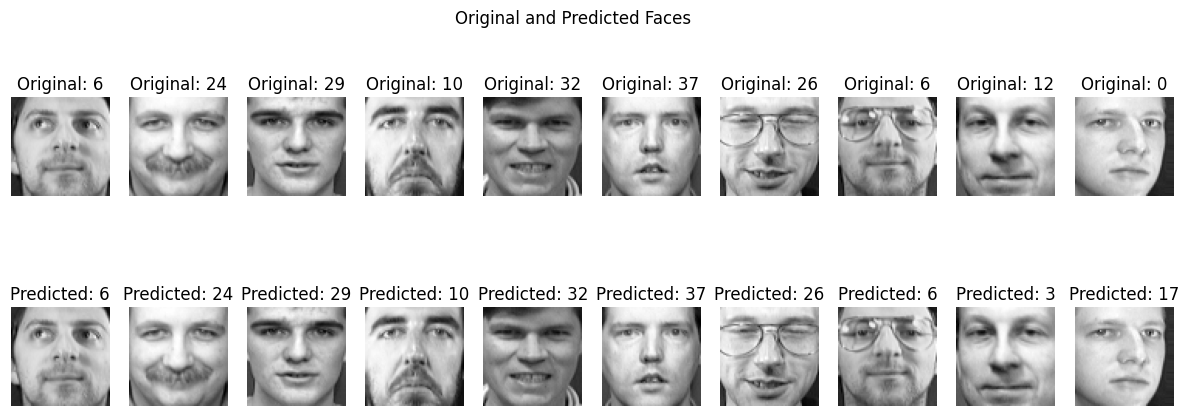

In [ ]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_pca, y_train)

y_pred = classifier.predict(X_test_pca)

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

indices = np.random.choice(len(X_test), 10, replace=False)
X_test_selected = X_test[indices]
y_test_selected = y_test[indices]
y_pred_selected = y_pred[indices]

fig, axarr = plt.subplots(2, 10, figsize=(15, 5))

for i in range(10):
    axarr[0, i].imshow(X_test_selected[i].reshape(64, 64), cmap='gray')
    axarr[0, i].set_title(f'Original: {y_test_selected[i]}')
    axarr[0, i].axis('off')

    axarr[1, i].imshow(X_test_selected[i].reshape(64, 64), cmap='gray')
    axarr[1, i].set_title(f'Predicted: {y_pred_selected[i]}')
    axarr[1, i].axis('off')

plt.suptitle("Original and Predicted Faces")
plt.show()


#**Analysis of Classifier Performance**



**Accuracy Results:**

1. **Naive Bayes: 78%**
2. **Logistic Regression: 91%**

**Performance Comparison:**
The Logistic Regression model shows a significant improvement over the Naive Bayes classifier. A difference of 13% in accuracy indicates that the Logistic Regression model is better at correctly classifying the test data.

**Possible Reasons for Performance Difference:**

1. Assumptions: Naive Bayes assumes feature independence, which might not hold true in image data, leading to lower performance. In contrast, Logistic Regression can account for correlations between features.

2. Model Complexity: Logistic Regression can capture more complex relationships in the data compared to the simpler Naive Bayes model.

**Implications:**
The higher accuracy of Logistic Regression suggests it may be more suitable for the given dataset, particularly in distinguishing between different classes in image data. The performance of Naive Bayes may indicate that while it is a good baseline model, it may not be ideal for scenarios where features are interdependent.